In [1]:
import helper
import numpy as np
import os
import matplotlib.pyplot as plt

/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:166: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:187: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [2]:
pop_size = 20
grn_size=22
dev_steps = 22
num_cells = 22
geneid=1
try_seedints = [69904,149796]

rule = 30

all_targs=[]
for s in try_seedints:
    random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
    #targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, r, s)
    start_pattern = helper.seedID2string(s, num_cells)
    start_expression = helper.seed2expression(start_pattern, pop_size, num_cells, grn_size, geneid)
    targets = helper.rule2targets_wrapped_wstart(int(rule), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
    all_targs.append(targets)

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
target1, _, fitnesses1 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[0])
target2, _, fitnesses2 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[1])



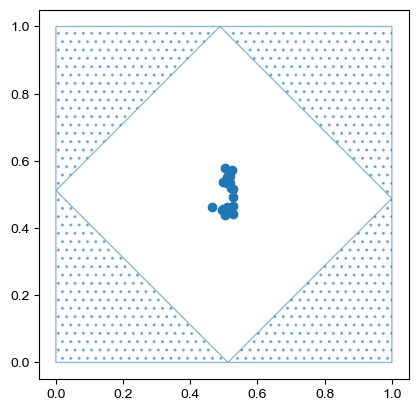

In [3]:
landmarks=helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

In [4]:
root="results_testing_saving/"
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,20_000,20_000]
rule = 30
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 2
pop_size = 1000

all_fits = []
for g in range(len(season_lens)):
    fits=[np.loadtxt(os.path.expanduser(root+f"stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_both_fits.txt")) for i in range(num_repeats)]
    fits = np.array(fits)
    num_gens = int(fits.shape[1]/2/pop_size)
    fits = fits.reshape(num_repeats, num_gens, 2, pop_size)
    all_fits.append(fits)
all_fits=np.vstack(all_fits)
all_fits=np.reshape(all_fits, (3, num_repeats, num_gens, 2, pop_size ))
all_fits.shape

(3, 2, 2000, 2, 1000)

1999


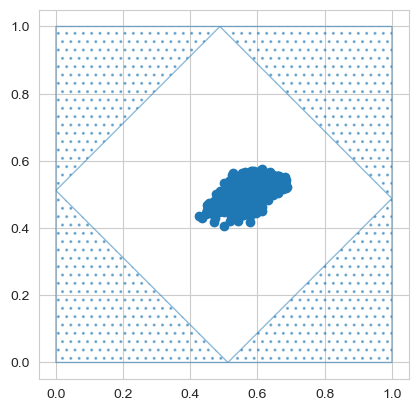

In [5]:
#NOTE: for static envs, fitnesses 1 is always the env they were evaluated on 
# (as opposed to fitnesses 2 being the relevant one when testing environment 1)

repid=1
a=list(range(2000))
check_freq=300
int_gens=a[check_freq-1::check_freq]

int_gens=[1999]

for i in int_gens:
    print(i)
    fitnesses1=all_fits[0][repid][i][0]
    fitnesses2=all_fits[0][repid][i][1]

    helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

#0.77429666 0.68433944 env 1
#0.67506982 0.73483343 env 2
#0.73658872 0.68701547

In [6]:
all_fits.shape

(3, 2, 2000, 2, 1000)

In [20]:
a = np.array([[[0.5, 0.2],[0.5, 0.2],[0.5, 0.2]],[[0.5, 0.2],[0.5, 0.2],[0.5, 0.2]]])
print(a.shape)
b = np.array([0.1, 0.1])
a -b 

(2, 3, 2)


array([[[0.4, 0.1],
        [0.4, 0.1],
        [0.4, 0.1]],

       [[0.4, 0.1],
        [0.4, 0.1],
        [0.4, 0.1]]])

In [34]:
landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])
bestgen=np.array([landmarks_list[0],landmarks_list[1]])
max_distance_best = helper.calculate_distance(bestgen[0], bestgen[1], landmarks_list[1], landmarks_list[2]) #bottom left corner
bot=np.array([0,0])
top=np.array([1,1])
diagonal_vector = top - bot
diagonal_vector_expanded = diagonal_vector[np.newaxis, np.newaxis, np.newaxis, :, np.newaxis]
bot_expanded = bot[np.newaxis, np.newaxis, np.newaxis, :, np.newaxis]

distance_best = np.sqrt((bestgen[0] - all_fits[:,:,:,0,:]) ** 2 + (bestgen[1] - all_fits[:,:,:,1,:]) ** 2) #want this to be small
prop_distance_best = 1 - distance_best/max_distance_best

#x1, y1, x2, y2
#math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

distance_line = np.cross(diagonal_vector_expanded, all_fits - bot_expanded, axis = 3) / np.linalg.norm(diagonal_vector_expanded) #want this to be small
print(distance_line.shape)

max_distance_line = calculate_distance(bestgen[0], bestgen[1], landmarks_list[3], landmarks_list[4]) #top right corner
prop_distance_line = 1 - distance_line/max_distance_line

conz_BH = (prop_distance_best + prop_distance_line) / 2

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_23306/2056635957.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


(1, 1, 1, 2, 1) (3, 2, 2000, 2, 1000)
1.4142135623730951
(3, 2, 2000, 1000)


NameError: name 'calculate_distance' is not defined

In [8]:
from tqdm import trange
from numba import njit, prange

#@njit(parallel=True)
def calc_conz_overtime(num_repeats, num_gens, pop_size, all_fits, landmarks):
    vari_gen = np.zeros((num_repeats,num_gens), dtype=np.float64)
    for r in range(num_repeats-1):
        for g in trange(num_gens):
            pop = all_fits[0,r,g,:,:]
            indv_vals = 0
            for ind in range(pop_size):
                f1 = pop[0,ind]
                f2 = pop[1,ind]
                conz_BH = helper.calc_conz_BH(f1, f2, landmarks)
                indv_vals += conz_BH
            vari_gen[r,g] = indv_vals/pop_size
    return vari_gen

landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])
print(landmarks_list)
calc_conz_overtime(num_repeats, num_gens, pop_size, all_fits, landmarks_list)

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_23306/3967280146.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


[0.74407115 0.74407115 0.         0.51185771 1.         0.48814229]


100%|██████████| 2000/2000 [00:23<00:00, 84.84it/s]


array([[0.78115653, 0.80425384, 0.81361625, ..., 0.94162628, 0.94164849,
        0.94150064],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
plt.plot(conz_BH)

In [8]:
from numba import njit
import math

@njit
def calculate_sqrt(x):
    return math.sqrt(x)

result = calculate_sqrt(16)
print(result)  # Output: 4.0


4.0
